In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic_train_data.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


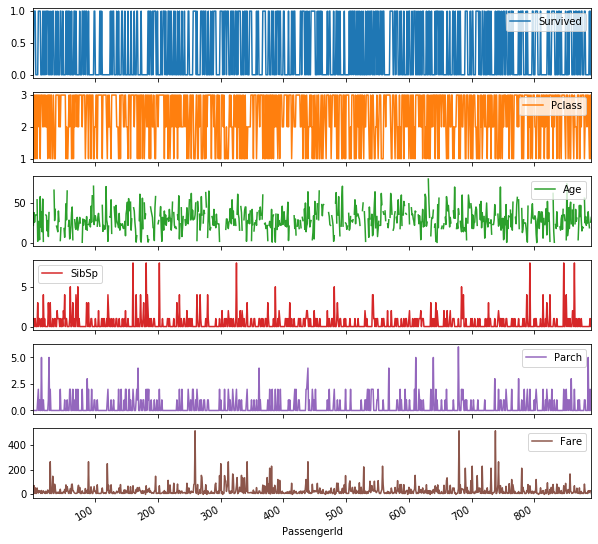

In [5]:
df.plot(subplots=True,figsize=(10,10))
plt.show()

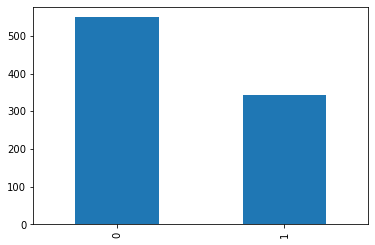

In [6]:
df.Survived.value_counts().plot.bar()
plt.show()

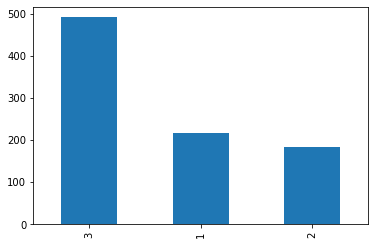

In [7]:
df.Pclass.value_counts().plot.bar()
plt.show()

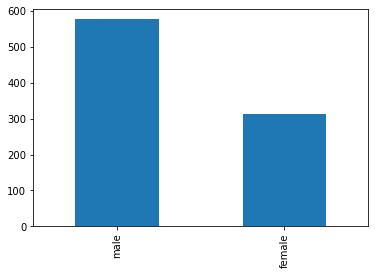

In [8]:
df.Sex.value_counts().plot.bar()
plt.show()

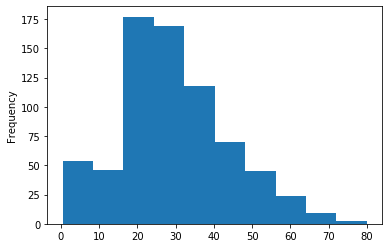

In [9]:
df.Age.plot.hist()
plt.show()

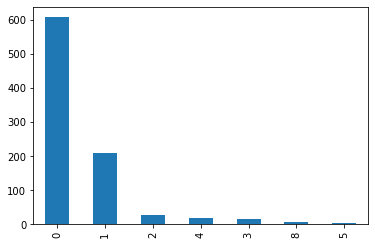

In [10]:
df.SibSp.value_counts().plot.bar()
plt.show()

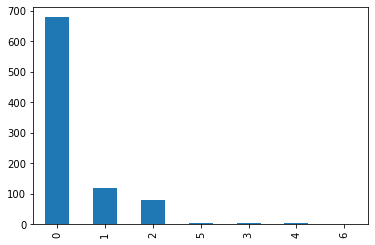

In [11]:
df.Parch.value_counts().plot.bar()
plt.show()

In [12]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

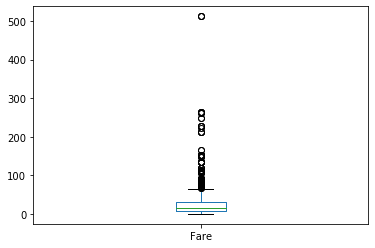

In [13]:
df.Fare.plot(kind='box')
plt.show()

In [14]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,0
2,1,female,38.0,1,0,71.2833,1
3,3,female,26.0,0,0,7.9250,1
4,1,female,35.0,1,0,53.1000,1
5,3,male,35.0,0,0,8.0500,0


In [15]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,0,22.0,1,0,7.2500,0
2,1,1,38.0,1,0,71.2833,1
3,3,1,26.0,0,0,7.9250,1
4,1,1,35.0,1,0,53.1000,1
5,3,0,35.0,0,0,8.0500,0


In [16]:
# missing data
df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 7 columns):
Pclass      714 non-null int64
Sex         714 non-null int64
Age         714 non-null float64
SibSp       714 non-null int64
Parch       714 non-null int64
Fare        714 non-null float64
Survived    714 non-null int64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [18]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [19]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)

In [20]:
X_train.shape, X_test.shape

((535, 6), (179, 6))

In [21]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

In [22]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.7597765363128491

In [24]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,70,19
True Survival,24,66
